## Importando os pacotes necessários

In [1]:
import pygeostat as gs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importando o banco de dados

In [4]:
walker_lake = gs.DataFile(flname='dados/dataset01_dense_samp.dat', x='x', y='y')

Os bancos de dados importados com a classe DataFile são um data frame pandas chamado data por padrão, então todas as funções e métodos do pandas funcionam aqui

## Análise exploratória dos dados

Plotando mapas

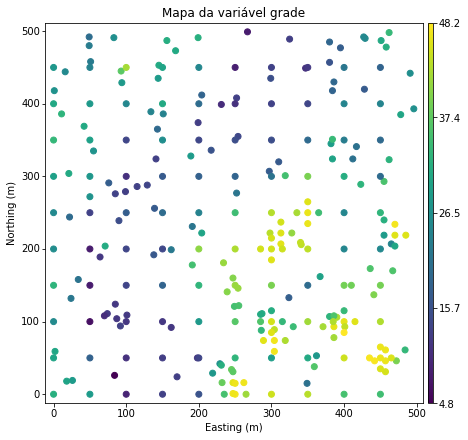

In [8]:
gs.locmap(walker_lake, var = "grade", title='Mapa da variável grade', outfl='figuras/mapav', figsize=(7,7))

Obtendo os pesos de desagrupamento

Com o pygeostat é possível rodar programas da biblioteca GSLib

In [15]:
#para rodar programas GSLib definimos uma variável do tip string que contem o arquivo de parâmetros da rotina 
celldecluspar = '''                   Parameters for CELLDECLUS
                  *************************

START OF PARAMETERS:
{datafl}                    -file with data
{varcols}                   -columns for X, Y, Z, and variable
-1.0e21     1.0e21          -trimming limits
{sumoutfl}                  -file for summary output
{dataoutfl}                 -file for output with data and weights
{anis}                      -Y and Z cell anisotropy (Ysize=size*Yanis)
{cellspar}                  -number of cell sizes, min size, max size
-1  6.0                     -cell size to keep: -1 = minimum
                                                 0 = specified
                                                +1 = maximum

'''

#precisamos também definir um dicionário que substituirá os parâmetros no arquivo .par
celldecluspars = {
'datafl':walker_lake.flname,
'varcols':'1 2 0 3',
'sumoutfl':'01 declus/sumoutfl.out',
'dataoutfl':'01 declus/dataoutfl.out',
'anis':'1 1',
'cellspar':'50 30 200'
}

#precisamos informar qual o executável e arquivo de paramêtro queremos rodar
celldeclus = gs.Program(program='01 declus/celldeclus/CellDeclus', parfile='01 declus/celldeclus/histplt.par')

#finalmente podemos rodar o programa
celldeclus.run(parstr=celldecluspar.format(**celldecluspars))

Calling:  ['01 declus/celldeclus/CellDeclus', '01 declus/celldeclus/histplt.par']

 CELLDECLUS Version: 4.000

  data file = dados/dataset01_dense_samp.dat          
  columns =            1           2           0           3
  tmin,tmax =  -1.0000000E+21  1.0000000E+21
  summary file = 01 declus/sumoutfl.out                  
  output file = 01 declus/dataoutfl.out                 
  anisotropy =    1.000000       1.000000    
  ncell min max =           50   30.00000       200.0000    
  minmax flag =           -1   6.000000    
 

 There are      272 data with:
   mean value            =   28.968748    
   minimum and maximum   =   4.8745098      48.105881    
   size of data vol in X =   496.00000    
   size of data vol in Y =   499.00000    
   size of data vol in Z =   0.0000000    

   declustered mean      =   26.313044    
   min and max weight    =  0.30930737      2.4581122    
   equal weighting       =   1.0000000    


 CELLDECLUS Version: 4.000 Finished



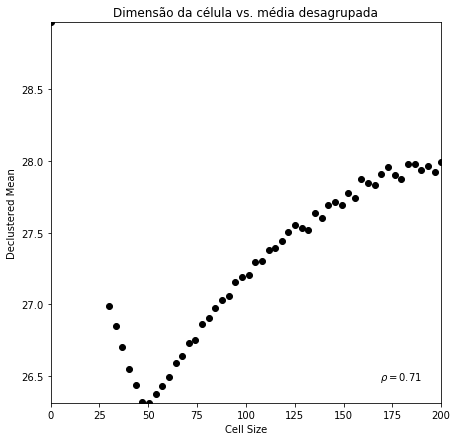

In [16]:
#vamos checar os resultados do celldeclus
declus_wt = gs.DataFile(flname='01 declus/sumoutfl.out')

#escolhendo quem serão os eixos do scatterplot
x, y = declus_wt.data['Cell Size'], declus_wt.data['Declustered Mean']

#plotando o scatterplot
gs.scatplt(x,y, c='k', figsize=(7,7), title='Dimensão da célula vs. média desagrupada')

In [18]:
#e agora importar a dataset com pesos de desagrupamento
walker_lake_declus = gs.DataFile(flname='01 declus/dataoutfl.out', x='x', y='y')

print(walker_lake_declus.data.head())

       x      y     grade  Cell Declustering Weight
0  349.0   15.0  20.98431                  1.021390
1  231.0  399.0  10.38039                  0.822290
2  386.0  430.0  19.35294                  0.740215
3  151.0  386.0  23.83922                  0.845028
4   50.0  272.0  27.10196                  0.847788


Plotando histogramas desagrupados

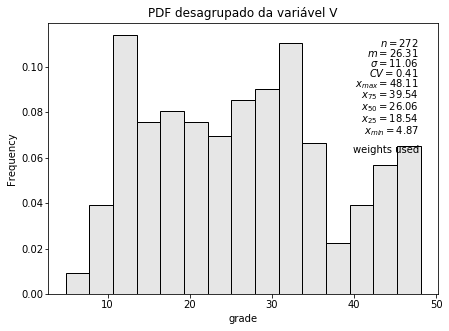

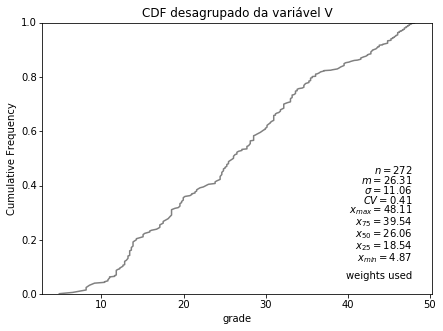

In [19]:
gs.histplt(walker_lake_declus, var='grade', wt='Cell Declustering Weight', figsize=(7,5), outfl='figuras/pdfv', title='PDF desagrupado da variável V')

gs.histplt(walker_lake_declus, var='grade', wt='Cell Declustering Weight', icdf=True, figsize=(7,5), outfl='figuras/cdfv', title='CDF desagrupado da variável V')

Variografia

Rodando o varmap

In [24]:
varmappar = '''                  Parameters for VARMAP
                  *********************

START OF PARAMETERS:
{datafl}                -file with data
1   {var}               -number of variables: column numbers
-1.0e21     1.0e21      -trimming limits
0                       -1=regular grid, 0=scattered values
20   20    1            -if =1: nx,     ny,   nz
5.0  5.0  1.0           -xsiz, ysiz, zsiz
{coords} 0              -if =0: columns for x,y, z coordinates
{outfl}                 -file for variogram output
{nlags}                 -nxlag, nylag, nzlag
{dlags}                 -dxlag, dylag, dzlag
5                       -minimum number of pairs
1                       -standardize sill? (0=no, 1=yes)
1                       -number of variograms
1   1   1               -tail, head, variogram type


type 1 = traditional semivariogram
     2 = traditional cross semivariogram
     3 = covariance
     4 = correlogram
     5 = general relative semivariogram
     6 = pairwise relative semivariogram
     7 = semivariogram of logarithms
     8 = semimadogram
     9 = indicator semivariogram - continuous
     10= indicator semivariogram - categorical

'''

varmappars = {
'datafl':walker_lake_declus.flname,
'var':walker_lake_declus.gscol('grade'),
'coords':walker_lake_declus.gscol(['x','y']),
'outfl':'02 varmap/varmapout.out',
'nlags':'20 20 0',
'dlags':'15 15 15'
}

varmap = gs.Program(program='02 varmap/varmap_3000/varmap', parfile='02 varmap/varmap_3000/varmap.par')

varmap.run(parstr=varmappar.format(**varmappars))

Calling:  ['02 varmap/varmap_3000/varmap', '02 varmap/varmap_3000/varmap.par']

 VARMAP Version: 3.000

  data file = 01 declus/dataoutfl.out                 
  number of variables =            1
  columns =            3
  trimming limits =  -1.0000000E+21  1.0000000E+21
  working with scattered data
  nx,ny,nz =           20          20           1
  xsiz,ysiz,zsiz =    5.000000       5.000000       1.000000    
  columns for x, y, and z =            1           2           0
  output file = 02 varmap/varmapout.out                 
  nxlag,nylag,nzlag =           20          20           0
  dxlag,dylag,dzlag =    15.00000       15.00000       15.00000    
  minimum number of pairs =            5
  flag to standardize sills =            1
  number of variograms =            1
  tail,head,type =            1           1           1
 
 Variable number            1
   Number   =          272
   Average  =    28.96874    
   Variance =    139.4176    
 
 Variogram  1 Semivariogram        

In [25]:
#um script simples para ler a definição do grid a partir do arquivo de saída do varmap
fp = open('02 varmap/varmapout.out', 'r')

for x, line in enumerate(fp):
    if x ==1:
        griddefstr = line.split()
        break

fp.close

print(griddefstr)

['6', '41', '41', '1', '-20.000000', '-20.000000', '0.0000000', '1.00000', '1.00000', '1.00000', '1']


In [26]:
#importando os resultados do varmap
varmapgrid = gs.GridDef([griddefstr[1], griddefstr[4], griddefstr[7], griddefstr[2], griddefstr[5], griddefstr[8], griddefstr[3], griddefstr[6], griddefstr[9]])
varmapout = gs.DataFile(flname='02 varmap/varmapout.out', griddef=varmapgrid)

print(varmapout.data.describe())

         variogram  number of pairs    head mean    tail mean  head variance  \
count  1673.000000      1681.000000  1673.000000  1673.000000         1673.0   
mean      1.024829        31.815586    29.024186    29.024186            0.0   
std       0.414216        20.669261     5.719251     5.719251            0.0   
min       0.013310         3.000000    15.365139    15.365138            0.0   
25%       0.699130        19.000000    24.315031    24.315031            0.0   
50%       0.996900        28.000000    29.246222    29.246225            0.0   
75%       1.319230        38.000000    33.128376    33.128376            0.0   
max       2.378020       338.000000    43.606861    43.606861            0.0   

       tail variance  
count         1673.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0  


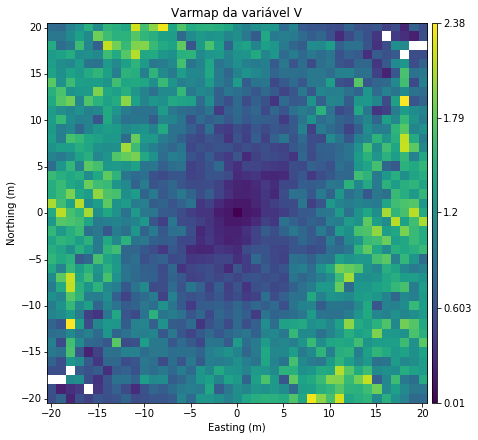

In [27]:
#plotando os resultados 
gs.pixelplt(varmapout, var='variogram', title='Varmap da variável V', figsize=(7,7), outfl='figuras/varmap')

#uma outra forma de visualizar os resultados
#gs.contourplt(varmapout, figsize=(7,7), outfl='figuras/countourmap', title='Contorno do varmap da variável V')

A variografia no pygeostat é centrada na classe gs.Variogram

In [33]:
#vamos definir a variável variograma
varg = gs.Variogram(datafl=walker_lake_declus, var='grade', ndim=2, ndir=2, mute=False, omnihz=False, variostd=True)

#vamos definir a direção de maior continuidade encontrada a partir do varmap
varg.inferdirections(azm=45, dip=0, tilt=0)

#vamos definir os parâmetros para o calculo do variograma
varg.settols(nlags=30, lagdist=10, lagtol=5, azmtol=22.5)

#finalmente vamos validar os parâmetros de cálculo
varg.validcalcpars()

The major direction has been set to a [azm, dip, tilt] value of: [0, 0.0, 0.0]
The minor direction has been set to a [azm, dip, tilt] value of: [270, 0.0, 0.0]
The major direction has been set to a [azm, dip, tilt] value of: [45.0, 0.0,
0.0]
The minor direction has been set to a [azm, dip, tilt] value of: [315.0, 0.0,
0.0]
         all directions
         all directions
         all directions
         all directions
         all directions
         all directions
         all directions


In [34]:
#calculando o variograma
varg.varcalc()

# mostrando os parâmetros utilizados ns calculos
print('\nParâmetros utilizados nos cálculos:')
for key, val in varg.calcpars.items():
    print(key+' = ', val)
    
#mostrando as primeiras linhas da tabela de resultados
print('\n Variograma experimemntal:\n', varg.expvargs[0].head(20))


Parâmetros utilizados nos cálculos:
variotypes =  1
variotails =  grade
varioheads =  grade
azm =  [45.0, 315.0]
dip =  [0.0, 0.0]
tilt =  [0.0, 0.0]
azmtol =  [22.5, 22.5]
diptol =  [90, 90]
nlags =  [30, 30]
lagdist =  [10, 10]
lagtol =  [5, 5]
bandhorz =  [1e+21, 1e+21]
bandvert =  [1e+21, 1e+21]
variostd =  True
variosills =  None
strict =  True
variocutcat =  None
ang1 =  45.0
ang2 =  0.0
ang3 =  0.0

 Variograma experimemntal:
              h     vario  numpairs  azimuth  dip
0     2.236068  0.000000         2     45.0  0.0
1    10.931721  0.187843        36     45.0  0.0
2    20.257910  0.178473       135     45.0  0.0
3    29.051871  0.281755        82     45.0  0.0
4    39.718149  0.381471        94     45.0  0.0
5    49.258093  0.280749       174     45.0  0.0
6    60.308833  0.323235       214     45.0  0.0
7    70.587148  0.378201       386     45.0  0.0
8    80.454148  0.320960       287     45.0  0.0
9    89.701640  0.458820       312     45.0  0.0
10  100.178201  0.4682

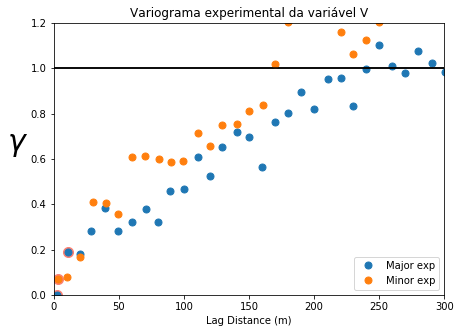

In [35]:
fig = varg.plot(titles='Variograma experimental da variável V', separate_plts=False, figsize=(7,5), ms=7, outfl='figuras/variograma_exp_V')
#o comando fig= evita que duas imagens sejam plotadas

Modelando o variograma

In [36]:
#modelando o variograma com o varfit
varg.fitmodel(nst=2, sill=1, maxiter=2500)

#mostrando o modelo
print('\n Variograma variável V: {}\n'.format(varg.model))


 Variograma variável V: 2    0.066131574              -  nst, nugget effect
1    0.077799073   45.0   0.0   0.0   - it,cc,ang1,ang2,ang3
       300.7417822280563    62.50833563643843    150.1131340267547       - a_hmax, a_hmin, a_vert
1    0.856069354   45.0   0.0   0.0   - it,cc,ang1,ang2,ang3
       302.0101234606954    216.099436630251    300.2262680535094       - a_hmax, a_hmin, a_vert



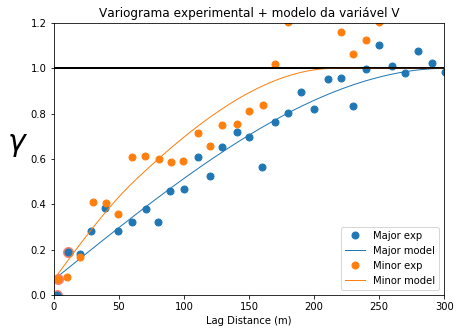

In [37]:
#plotando o modelo
fig = varg.plot(titles='Variograma experimental + modelo da variável V', separate_plts=False, model=True, figsize=(7,5), ms=7, outfl='figuras/variograma_model_V')

## Estimativas

Antes de qualquer coisa vamos validar o modelo de variograma e estratégia de busca de krigagem via validação cruzada

In [38]:
kt3dpar = '''                  Parameters for KT3D
                  *******************

START OF PARAMETERS:
{flname}              -file with data
0  1  2  0  3  0      -columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21      -trimming limits
1                     -option: 0=grid, 1=cross, 2=jackknife
{flname}              -file with jackknife data
2   3   0    4    0   -columns for X,Y,Z,vr and sec var
3                     -debugging level: 0,1,2,3
03 OK/kt3d.dbg        -file for debugging output
{outfl}               -file for kriged output
50   0.5    1.0       -nx,xmn,xsiz
50   0.5    1.0       -ny,ymn,ysiz
1    0.5    1.0       -nz,zmn,zsiz
1    1      1         -x,y and z block discretization
{minmax}              -min, max data for kriging
{maxoct}              -max per octant (0-> not used)
{srchradi}            -maximum search radii
{angs}                -angles for search ellipsoid
1     2.302           -0=SK,1=OK,2=non-st SK,3=exdrift
0 0 0 0 0 0 0 0 0     -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                     -0, variable; 1, estimate trend
extdrift.dat          -gridded file with drift/mean
4                     -column number in gridded file
{varg}
'''

kt3dpars = {
'flname':walker_lake_declus.flname,
'outfl':'03 OK/xvalid.out',
'minmax':'3 24',
'maxoct':'3',
'srchradi':'300 150 0',
'angs':'45 0 0',
'varg':varg.model
}

kt3d = gs.Program(program= '03 OK/kt3d_3000/kt3d', parfile='03 OK/kt3d_3000/kt3d.par')

kt3d.run(parstr=kt3dpar.format(**kt3dpars))

Calling:  ['03 OK/kt3d_3000/kt3d', '03 OK/kt3d_3000/kt3d.par']

 KT3D Version: 3.000

  data file = 01 declus/dataoutfl.out                 
  columns =            0           1           2           0           3
           0
  trimming limits =  -1.0000000E+21  1.0000000E+21
  kriging option =            1
  jackknife data file = 01 declus/dataoutfl.out                 
  columns =            2           3           0           4           0
  debugging level =            3
  debugging file = 03 OK/kt3d.dbg                          
  output file = 03 OK/xvalid.out                        
  nx, xmn, xsiz =           50  0.5000000       1.000000    
  ny, ymn, ysiz =           50  0.5000000       1.000000    
  nz, zmn, zsiz =            1  0.5000000       1.000000    
  block discretization:           1           1           1
  ndmin,ndmax =            3          24
  max per octant =            3
  search radii =    300.0000       150.0000      0.0000000E+00
  search anisotropy ang

In [39]:
#importando o arquqivo da validação cruzada
x_valid = gs.DataFile(flname='03 OK/xvalid.out', x='X', y='Y', z='Z')

print(x_valid.data.head())

       X      Y    Z       True   Estimate  EstimationVariance  \
0  349.0   15.0  0.5  20.984310  39.957508            0.205583   
1  231.0  399.0  0.5  10.380390  13.278664            0.212291   
2  386.0  430.0  0.5  19.352940  18.748228            0.178641   
3  151.0  386.0  0.5  23.839220  24.718384            0.188695   
4   50.0  272.0  0.5  27.101959  19.270773            0.213729   

   Error: est-true  
0        18.973198  
1         2.898274  
2        -0.604712  
3         0.879164  
4        -7.831186  


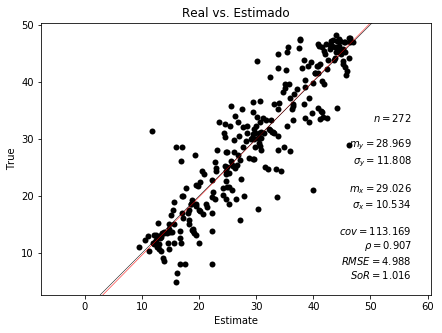

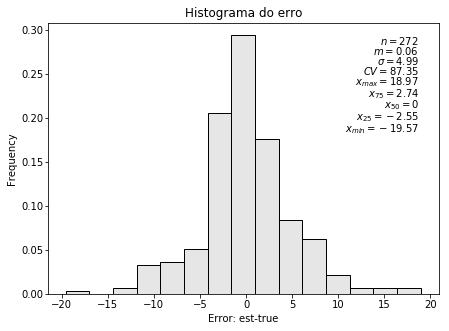

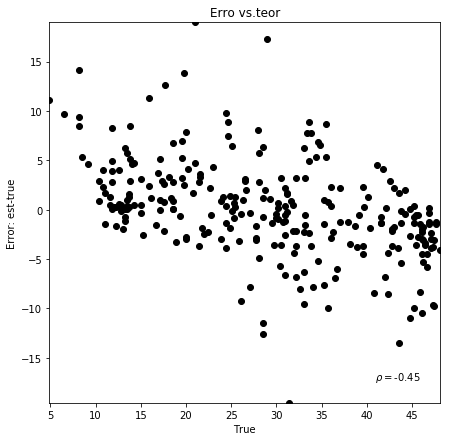

In [40]:
#plotando o scatterplot real x estimado
x, y = x_valid.data['Estimate'], x_valid.data['True']

gs.scatxval(x, y, title='Real vs. Estimado', outfl='figuras/real_est', figsize=(7,5))

#plotando o histograma do erro
gs.histplt(x_valid, var='Error: est-true', title='Histograma do erro', outfl='figuras/error_hist', figsize=(7,5))

#plotando scatterplot do erro versus teor real
x1, y1 = x_valid.data['True'], x_valid.data['Error: est-true']

gs.scatplt(x1,y1, c='k', figsize=(7,7), title='Erro vs.teor')

 Krigagem em um grid

In [41]:
#vamos primeiro criar um grid
#a funcao infergriddef cria um grid a partir das dimensoes do bloco OU numero de blocos
walker_lake_declus.infergriddef(blksize=(25,25,None), databuffer=2)

Pygeostat GridDef:
20 10.5 25.0 
21 10.5 25.0 
1 0.5 1.0

In [42]:
kt3dpar = '''                  Parameters for KT3D
                  *******************

START OF PARAMETERS:
{flname}              -file with data
0  1  2  0  3  0      -columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21      -trimming limits
0                     -option: 0=grid, 1=cross, 2=jackknife
{flname}              -file with jackknife data
2   3   0    4    0   -columns for X,Y,Z,vr and sec var
3                     -debugging level: 0,1,2,3
03 OK/kt3d.dbg        -file for debugging output
{outfl}               -file for kriged output
{griddef}
5    5      5         -x,y and z block discretization
{minmax}              -min, max data for kriging
{maxoct}              -max per octant (0-> not used)
{srchradi}            -maximum search radii
{angs}                -angles for search ellipsoid
1     2.302           -0=SK,1=OK,2=non-st SK,3=exdrift
0 0 0 0 0 0 0 0 0     -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                     -0, variable; 1, estimate trend
extdrift.dat          -gridded file with drift/mean
4                     -column number in gridded file
{varg}
'''

kt3dpars = {
'flname':walker_lake_declus.flname,
'outfl':'03 OK/kt3d_OK.out',
'griddef':walker_lake_declus.griddef,
'minmax':'3 24',
'maxoct':'3',
'srchradi':'300 150 0',
'angs':'45 0 0',
'varg':varg.model
}

kt3d = gs.Program(program= '03 OK/kt3d_3000/kt3d', parfile='03 OK/kt3d_3000/kt3d.par')

kt3d.run(parstr=kt3dpar.format(**kt3dpars))

Calling:  ['03 OK/kt3d_3000/kt3d', '03 OK/kt3d_3000/kt3d.par']

 KT3D Version: 3.000

  data file = 01 declus/dataoutfl.out                 
  columns =            0           1           2           0           3
           0
  trimming limits =  -1.0000000E+21  1.0000000E+21
  kriging option =            0
  jackknife data file = 01 declus/dataoutfl.out                 
  columns =            2           3           0           4           0
  debugging level =            3
  debugging file = 03 OK/kt3d.dbg                          
  output file = 03 OK/kt3d_OK.out                       
  nx, xmn, xsiz =           20   10.50000       25.00000    
  ny, ymn, ysiz =           21   10.50000       25.00000    
  nz, zmn, zsiz =            1  0.5000000       1.000000    
  block discretization:           5           5           5
  ndmin,ndmax =            3          24
  max per octant =            3
  search radii =    300.0000       150.0000      0.0000000E+00
  search anisotropy ang

In [43]:
#importando a krigagem
kt3d_OK = gs.DataFile(flname='03 OK/kt3d_OK.out', griddef=walker_lake_declus.griddef)

print(kt3d_OK.data.head())

    Estimate  EstimationVariance
0  30.388758            0.038824
1  26.878040            0.065649
2  19.884239            0.063524
3  11.232830            0.072936
4   9.645684            0.078172


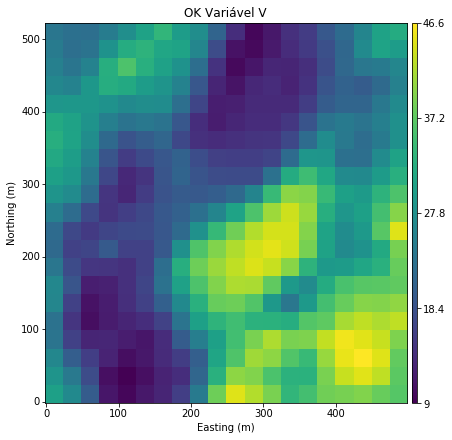

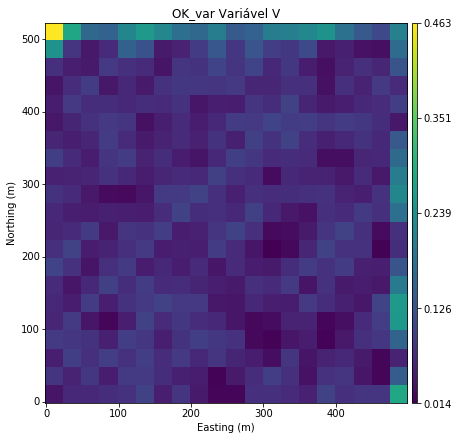

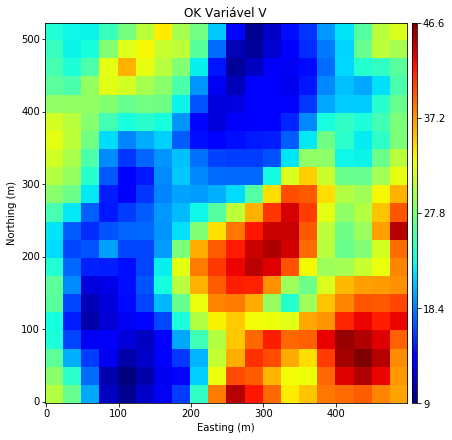

In [44]:
#plotando o mapa
gs.pixelplt(kt3d_OK, var='Estimate', figsize=(7,7), outfl='figuras/OK_V', title='OK Variável V')
gs.pixelplt(kt3d_OK, var='EstimationVariance', figsize=(7,7), outfl='figuras/OK_var_V', title='OK_var Variável V')

#mudando a escala de cores para uma mais familiar
gs.pixelplt(kt3d_OK, var='Estimate', figsize=(7,7), outfl='figuras/OK_V_jet', title='OK Variável V', cmap='jet')


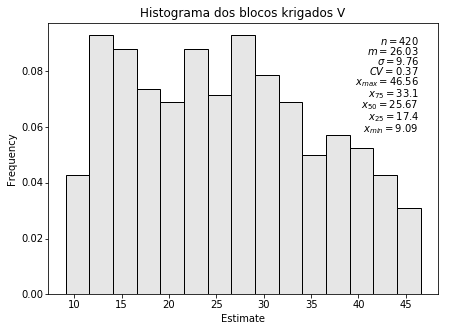

In [45]:
#plotando o histograma dos blocos krigados
gs.histplt(kt3d_OK, var='Estimate', figsize=(7,5), title='Histograma dos blocos krigados V', outfl='figuras/hist_OK')

## Validando o modelo

Gerando swath plots nas direções x e y

In [47]:
swathpltpar = '''START OF PARAMETERS:
2                     -number of data files to plot
{pointfl}             -data file
0                     -scattered or gridded? (gridded = 1)
1 2 0 3               -columns for X,Y,Z,Var
0.0001   1.0e21       -trimming limits
2  1  5  1            -line width (0=none), dashing, bullet size (0=none), color
{gridfl}              -data file
1                     -scattered or gridded? (gridded = 1)
1                     -column number
{griddef}
0.0001   1.0e21       -trimming limits
2  0  0  2            -line width (0=none), dashing, bullet size (0=none), color
{outfl}               -file for Postscript output
{dir}                 -azimuth, dip
{bins}                -number of bins
{xminmax}             -X min and max
{yminmax}             -Y min and max, (0=arith, 1=log) (max<min for auto scaling based on data file #1)
0                     -plot histogram of the bin count of the first data file (0=no, 1=yes)
{title}               -title
Distance              -X axis label (default=get from data file #1)
Grade                 -y axis label (default=get from data file #1)
1   25  75            -error bars?(1=yes), lower percentile, upper percentile
'''

swathplt = gs.Program(program='04 swathplots/swathplt1001/swathplt/swathplt', parfile='04 swathplots/swathplt1001/swathplt/swathplt.par')


#agora vamos scriptar rotinas GSLib para rodar em paralelo
#o primeiro passo é criar uma lista vazia onde serão armazenados os dicionários de parâmetros
callpars = []

#agora iniciaremos o loop
for directions in ['0 0', '90 0']:

    #um dicionário para cada item do loop
    swathpltpars={
    'pointfl':walker_lake_declus.flname,
    'gridfl':kt3d_OK.flname,
    'griddef':walker_lake_declus.griddef,
    'outfl':'04 swathplots/swath_'+directions+'.ps',
    'dir':directions,
    'bins':'20',
    'xminmax':'0 -1',
    'yminmax':'0 -1 0',
    'title':'Swath plot '+directions
    }

    #adiciono os diferentes arquivos de parâmetro à lista vazia criada anteriormente
    callpars.append({'parstr':swathpltpar.format(**swathpltpars)})

    #finalemtne posso rodar em paralelo
gs.runparallel(swathplt, callpars, reportprogress=True)

Creating parallel processes


Pool assembled, asynchronously processing
Asynchronous execution finished.
